In [15]:
import pandas as pd
df = pd.read_csv('spam.csv')
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [16]:
## Covnert the text into some numbers, by some form. Obviously
dummies = pd.get_dummies(df.Category)

In [17]:
df = pd.concat([df, dummies], axis = 'columns')


In [18]:
df.head(10)

,Category,Message,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1,0
1,ham,Ok lar... Joking wif u oni...,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,ham,U dun say so early hor... U c already then say...,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,1
6,ham,Even my brother is not like to speak with me. ...,1,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,1,0
8,spam,WINNER!! As a valued network customer you have...,0,1
9,spam,Had your mobile 11 months or more? U R entitle...,0,1


In [19]:
df.drop(['ham', 'spam'], axis = 'columns', inplace = True)

In [21]:
df['spam'] = df['Category'].apply(lambda x : 1 if x == 'spam' else 0)

In [22]:
df.head(10)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.2)

### Count Vectorizer Technique

#### Used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

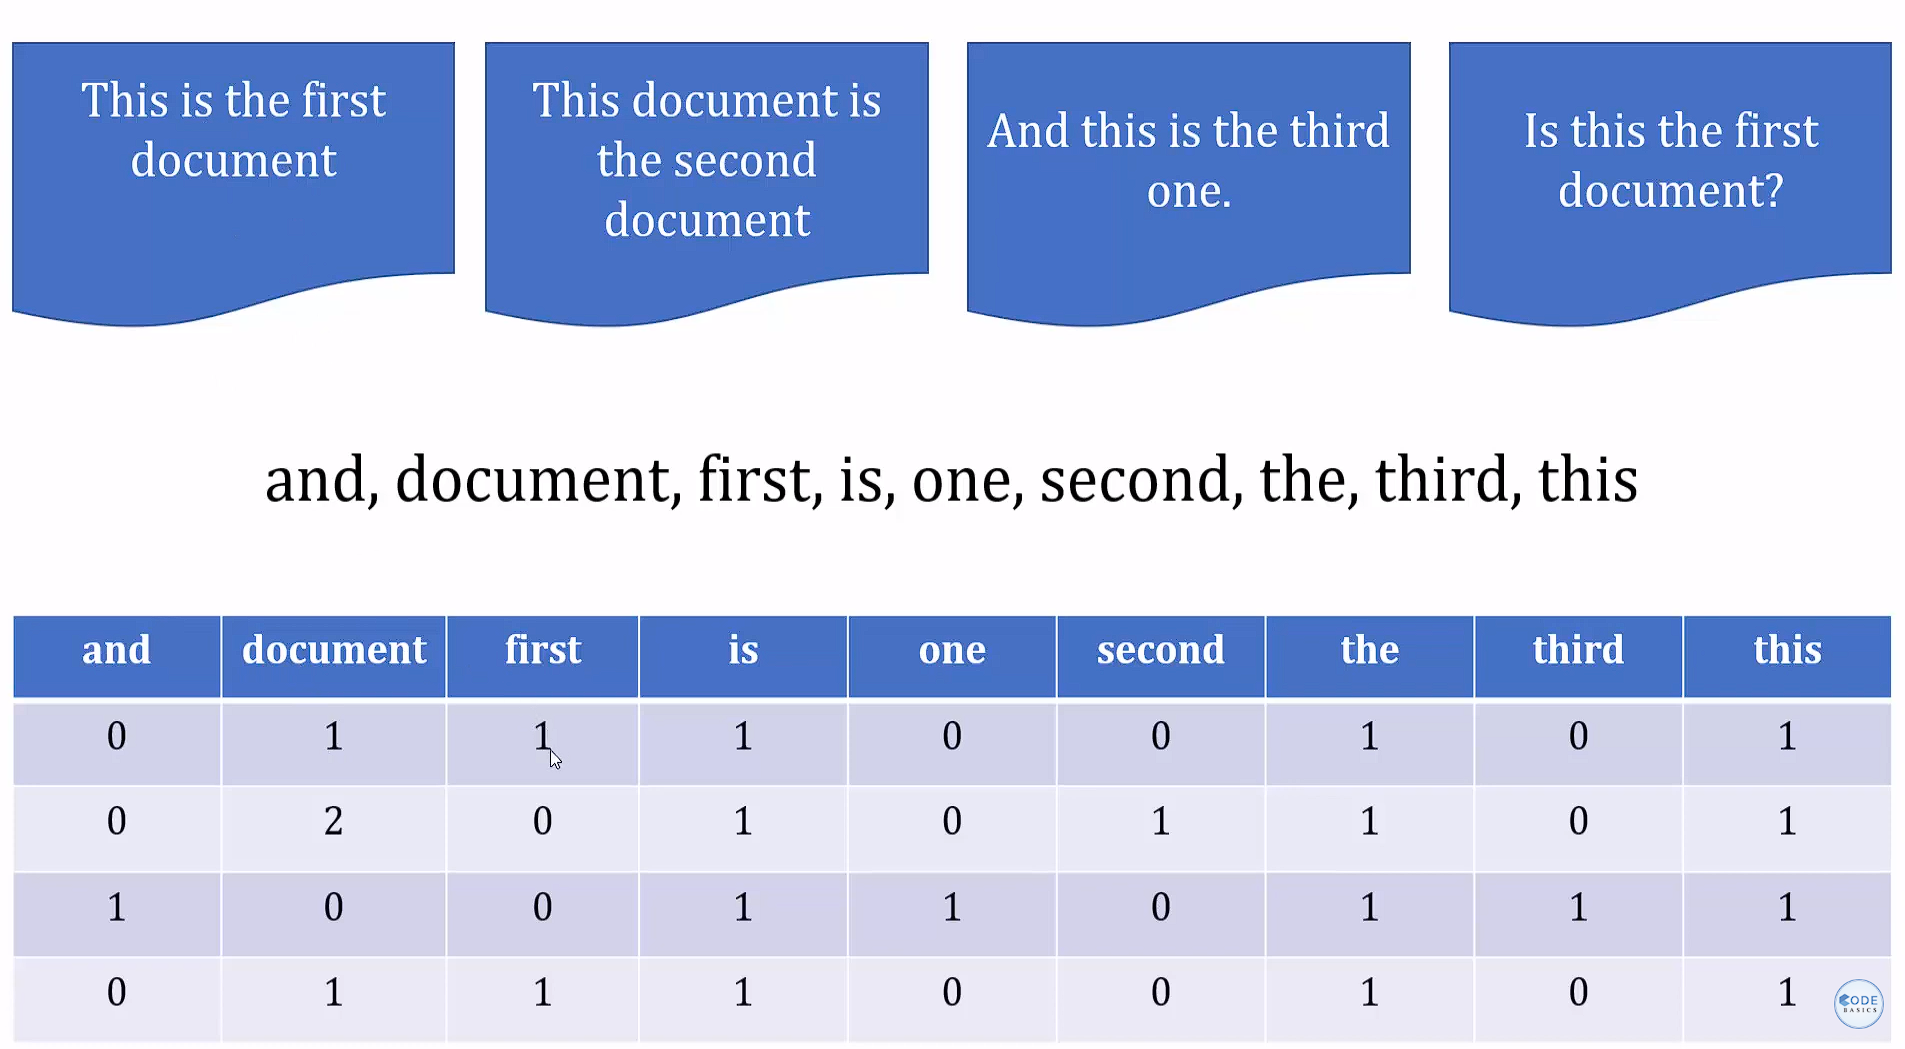

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

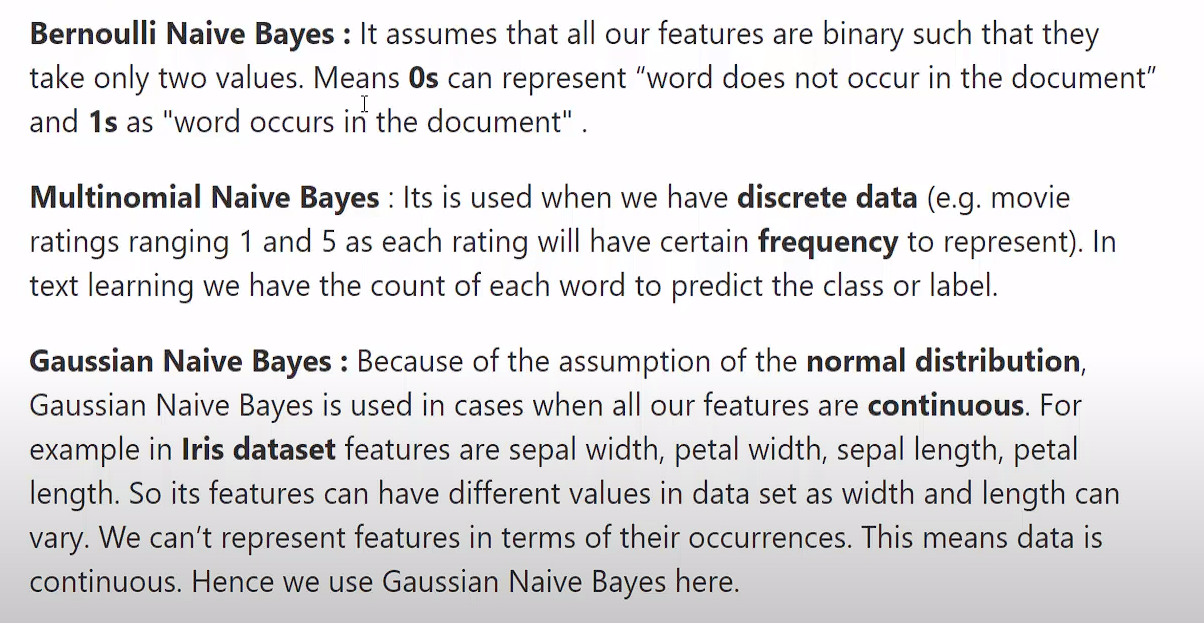

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [40]:
emails = [
    'Hey mohan, watch football game tomorrow? Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [42]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9856502242152466

In [44]:
## Using pipeline to smoothen the steps or lineup the steps into a pipeline to say
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [47]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9856502242152466